# TIV.lib Example Notebook
### Gilberto Bernardes, António Ramires

In this notebook, we present example code for the TIV.lib library. It is a python library for the content-based tonal description of musical audio signals, which implements the Tonal Interval Vector space. Its main novelty relies on the DFT-based perceptually-inspired Tonal Interval Vector space, from which multiple instantaneous and global representations, descriptors and metrics are computed---e.g., harmonic changes, dissonance, diatonicity, and musical key.

### Setup

Run the following cell to install TIV.lib and Essentia. Essentia is used to extract the Harmonic Pitch Class Profiles from an audio file.

In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    !git clone https://github.com/aframires/TIVlib.git
    %cd TIVlib
    !pip install essentia
    % cd ../

Import TIV.lib and numpy, and then crate the function to get the HPCP from a file.

In [2]:
from TIVlib import TIV as tiv
import numpy as np

In [3]:
from essentia.standard import MonoLoader, Windowing, Spectrum, SpectralPeaks, FrameGenerator, HPCP

def file_to_hpcp(filename):
    audio = MonoLoader(filename=filename)()
    windowing = Windowing(type='blackmanharris62')
    spectrum = Spectrum()
    spectral_peaks = SpectralPeaks(orderBy='magnitude',
                                    magnitudeThreshold=0.001,
                                    maxPeaks=5,
                                    minFrequency=20,
                                    maxFrequency=8000)
    hpcp = HPCP(maxFrequency=8000)#,
                #normalized='unitSum') #VERIFICAR QUE ISTO E O Q FAZ SENTIDO FAZER

    spec_group = []
    hpcp_group = []


    for frame in FrameGenerator(audio,frameSize=1024,hopSize=512):
        windowed = windowing(frame)
        fft = spectrum(windowed)
        frequencies, magnitudes = spectral_peaks(fft)
        final_hpcp = hpcp(frequencies, magnitudes)
  
        spec_group.append(fft)
        hpcp_group.append(final_hpcp)
    
    mean_hpcp = np.mean(np.array(hpcp_group).T, axis = 1)
    #Rotate the HPCP so that it starts in C
    mean_hpcp = np.roll(mean_hpcp,-3)
    return mean_hpcp

# Examples of the feature extraction of TIV.lib

Here we show example code on how to load audio files as HPCP. From this HPCP, we create a TIV object which then enables all the feature extraction.

In [4]:
#Reference: CMaj chord
c_maj = "./audio_files/looperman-l-1998259-0109381-adamsouth22-all-i-need-jazz-piano.wav"
#Consonant chords: GMaj, Amin
g_maj = "./audio_files/343416__sss-samples__pinao-melody-g-major.wav"
a_min = "./audio_files/254729__zuluonedrop__01-piano-al1.wav"
#Dissonant chords: C#Maj, D#min
c_sharp_maj = "./audio_files/looperman-l-0159051-0073982-minor2go-guitars-unlimited-its-you.wav"
d_sharp_min = "./audio_files/looperman-l-2921269-0190991-wavy-mallets-13.wav"

#Calculate the HPCP for each of the chords
c_maj_hpcp = file_to_hpcp(c_maj)
g_maj_hpcp = file_to_hpcp(g_maj)
a_min_hpcp = file_to_hpcp(a_min)
c_sharp_maj_hpcp = file_to_hpcp(c_sharp_maj)
d_sharp_min_hpcp = file_to_hpcp(d_sharp_min)

#Calculate the TIV for each HPCP
c_maj_tiv = tiv.from_pcp(c_maj_hpcp)
g_maj_tiv = tiv.from_pcp(g_maj_hpcp)
a_min_tiv = tiv.from_pcp(a_min_hpcp)
c_sharp_maj_tiv = tiv.from_pcp(c_sharp_maj_hpcp)
d_sharp_min_tiv = tiv.from_pcp(d_sharp_min_hpcp)

In this section we show how to extract the features related to the TIV weights.

In [5]:
#Examples on the magnitude and phase features
print("CMaj TIV.mag")
print(c_maj_tiv.mags())
print("TIV weights")
print(c_maj_tiv.weights)
print("CMaj TIV.phases")
print(c_maj_tiv.phases())
print("CMaj diatonicity")
print(c_maj_tiv.diatonicity())
print("CMaj wholetoneness")
print(c_maj_tiv.wholetoneness())
print("CMaj chromaticity")
print(c_maj_tiv.chromaticity())

CMaj TIV.mag
[0.32272603 1.96272485 3.96964528 2.57850107 6.65192073 0.14865546]
TIV weights
[3, 8, 11.5, 15, 14.5, 7.5]
CMaj TIV.phases
[-1.68089896 -0.6672935   0.98614265 -1.69770517  0.6200356   3.14159265]
CMaj diatonicity
0.4587531536793467
CMaj wholetoneness
0.01982072775141929
CMaj chromaticity
0.10757534367409728


Here we exemplify how the key of the TIV can be extracted using the library. We provide two modes for the key extraction, based on Shaath and Temperley profiles.

In [6]:
#Example on extracting keys
#Values are not the same as before
print("CMaj from Temperley profiles and the Shaath")
print(c_maj_tiv.key(mode='temperley'))
print(c_maj_tiv.key(mode='shaath'))
print("GMaj from Temperley profiles and the Shaath")
print(g_maj_tiv.key(mode='temperley'))
print(g_maj_tiv.key(mode='shaath'))
print("Amin from Temperley profiles and the Shaath")
print(a_min_tiv.key(mode='temperley'))
print(a_min_tiv.key(mode='shaath'))
print("C#Maj from Temperley profiles and the Shaath")
print(c_sharp_maj_tiv.key(mode='temperley'))
print(c_sharp_maj_tiv.key(mode='shaath'))
print("D#min from Temperley profiles and the Shaath")
print(d_sharp_min_tiv.key(mode='temperley'))
print(d_sharp_min_tiv.key(mode='shaath'))

CMaj from Temperley profiles and the Shaath
('c', 'min')
('C', 'maj')
GMaj from Temperley profiles and the Shaath
('G', 'maj')
('a', 'min')
Amin from Temperley profiles and the Shaath
('a', 'min')
('e', 'min')
C#Maj from Temperley profiles and the Shaath
('Db', 'maj')
('Db', 'maj')
D#min from Temperley profiles and the Shaath
('eb', 'min')
('eb', 'min')


In this section, we show the algorithm is able to infer consonance and dissonance from the audio. Chords which are more consonant (CMaj+GMaj) have a lower dissonance value than dissonant chords (CMaj+C#Maj).

In [7]:
#Example on combining sounds and evaluate its dissonance
combined_GM = tiv.combine(c_maj_tiv, g_maj_tiv)
combined_Am = tiv.combine(c_maj_tiv, a_min_tiv)
combined_CSM = tiv.combine(c_maj_tiv, c_sharp_maj_tiv)
combined_DSm = tiv.combine(c_maj_tiv, d_sharp_min_tiv)

print("Dissonance CMaj + GMaj")
print(tiv.dissonance(combined_GM))
print("Dissonance CMaj + Amin")
print(tiv.dissonance(combined_Am))
print("Dissonance CMaj + C#Maj")
print(tiv.dissonance(combined_CSM))
print("Dissonance CMaj + D#min")
print(tiv.dissonance(combined_DSm))

Dissonance CMaj + GMaj
0.7282281805430908
Dissonance CMaj + Amin
0.7599646661027813
Dissonance CMaj + C#Maj
0.8591292037988822
Dissonance CMaj + D#min
0.8256377800109891


Finally, we show an example of the distance metrics which are made available throught TIV.lib. Again, we can see that sounds with similar harmonic components are closer than ones with very different components.

In [8]:
#Example on calculating the distances between sounds
print("Euclidean and cosine distance between CMaj and GMaj")
print(tiv.euclidean(c_maj_tiv,g_maj_tiv))
print(tiv.cosine(c_maj_tiv,g_maj_tiv))

print("Euclidean and cosine distance between CMaj and AMin")
print(tiv.euclidean(c_maj_tiv,a_min_tiv))
print(tiv.cosine(c_maj_tiv,a_min_tiv))

print("Euclidean and cosine distance between CMaj and C#Maj")
print(tiv.euclidean(c_maj_tiv,c_sharp_maj_tiv))
print(tiv.cosine(c_maj_tiv,c_sharp_maj_tiv))

print("Euclidean and cosine distance between CMaj and D#min")
print(tiv.euclidean(c_maj_tiv,d_sharp_min_tiv))
print(tiv.cosine(c_maj_tiv,d_sharp_min_tiv))

Euclidean and cosine distance between CMaj and GMaj
6.318477493923422
0.821319288606021
Euclidean and cosine distance between CMaj and AMin
8.275785694629691
1.1431315115168315
Euclidean and cosine distance between CMaj and C#Maj
13.805051126546111
2.164094585490875
Euclidean and cosine distance between CMaj and D#min
15.95881368143736
2.0869355901016613


TIV objects can be plot to understand better the present intervals

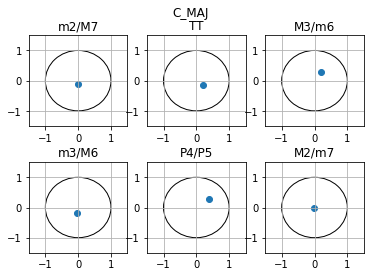

In [9]:
c_maj_tiv.plot_tiv(title="C_MAJ")

TIV pitch shifting consist just only in rotating the phase of the vectors

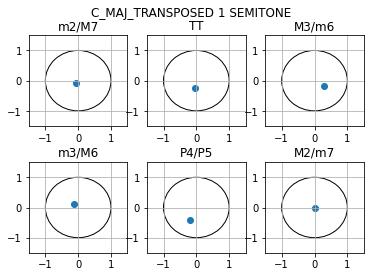

In [10]:
c_maj_tiv_pshift_1 = c_maj_tiv.transpose(1)
c_maj_tiv_pshift_1.plot_tiv(title="C_MAJ_TRANSPOSED 1 SEMITONE")

For a full description of the features available in the TIV.lib, please refer to the TIV website: https://sites.google.com/site/tonalintervalspace/home